# Pandas

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

pd.options.display.max_rows = 50
pd.options.display.max_columns = None

warnings.filterwarnings("ignore")

# Faker dataset

In [2]:
# !pip install Faker
import random
from faker import Faker
fake = Faker()

Faker.seed(1)
fake.unique.clear()

customers_df_sample_size = 10
sellers_df_sample_size = 5
orders_df_sample_size = 20

customers_df = (
    pd.DataFrame(data = {'id': [fake.unique.random_int() for i in range(customers_df_sample_size)],
                         'name': [fake.name() for i in range(customers_df_sample_size)],
                         'city': [fake.city() for i in range(customers_df_sample_size)],
                         'email': [fake.email() for i in range(customers_df_sample_size)]})
    .sort_values('id')
    .reset_index(drop = True)
)

sellers_df = (
    pd.DataFrame(data = {'id': [fake.unique.random_int() for i in range(sellers_df_sample_size)],
                         'company': [fake.company() for i in range(sellers_df_sample_size)],
                         'city': [fake.city() for i in range(sellers_df_sample_size)]})
    .sort_values('id')
    .reset_index(drop = True)
)

orders_df = (
    pd.DataFrame(data = {'id': [fake.unique.random_int() for i in range(orders_df_sample_size)],
                         'customer_id': customers_df['id'].sample(orders_df_sample_size, replace = True, random_state = 0).reset_index(drop = True),
                         'seller_id': sellers_df['id'].sample(orders_df_sample_size, replace = True, random_state = 0).reset_index(drop = True),
                         'amount': [fake.random_number(digits = 3) * 0.1 for i in range(orders_df_sample_size)],
                         'tax':[fake.random_number(digits = 1) * 0.1 for i in range(orders_df_sample_size)],
                         'create_timestamp': [fake.date_time_this_year() for i in range(orders_df_sample_size)],
                         'status': random.choices(['Shipped','Delivered','Processing'], k = orders_df_sample_size),
                         'promotion': random.choices([True, False], k = orders_df_sample_size),
                         'notes': [fake.text(max_nb_chars = 20) for i in range(orders_df_sample_size)]})
    .sort_values('id')
    .reset_index(drop = True)
)

## customers_df

In [3]:
customers_df

,id,name,city,email
0,1033,Nathan Perez,Romeroborough,tinatownsend@example.net
1,1931,Joshua Crosby,Chapmanton,stephen48@example.net
2,2201,Allen Houston,Lake Victoria,twilliams@example.net
3,3439,Kristie May,Tracytown,ireed@example.net
4,4179,Stephanie Johnson,Justinfort,richardcooper@example.net
5,6219,Dylan Smith,Port Frankfurt,shelleygutierrez@example.com
6,7364,Daniel Kim,Ortegastad,aprilhoffman@example.com
7,7737,David Hall II,Christopherhaven,castillomichael@example.net
8,8117,Daniel Henderson,Sanchezfurt,reyesmelody@example.net
9,9325,Philip Smith,Davidmouth,kholland@example.net


## sellers_df

In [4]:
sellers_df

,id,company,city
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


## orders_df

In [5]:
orders_df

,id,customer_id,seller_id,amount,tax,create_timestamp,status,promotion,notes
0,292,4179,458,32.8,0.4,2021-06-18 03:23:15,Delivered,True,Easy attention.
1,341,6219,5425,58.9,0.6,2021-08-11 16:18:50,Shipped,False,Guy who us third.
2,578,8117,5425,43.6,0.8,2021-07-11 05:02:29,Shipped,True,Different executive.
3,1781,1033,458,22.8,0.4,2021-01-15 12:48:40,Shipped,True,We father affect.
4,2399,7364,9828,64.6,0.0,2021-03-17 09:19:00,Delivered,False,Compare whether.
5,2625,8117,3761,6.0,0.0,2021-02-10 13:18:15,Delivered,True,Go plan move.
6,3425,7737,7506,3.1,0.4,2021-05-15 17:37:48,Shipped,True,Group laugh.
7,3614,8117,3761,21.7,0.2,2021-07-14 02:28:22,Delivered,True,Ok speech body full.
8,3692,2201,9828,82.2,0.9,2021-09-19 19:33:41,Shipped,True,Nor memory special.
9,4152,3439,7506,53.6,0.1,2021-05-27 18:55:29,Delivered,False,Deep toward.


# 1. Data load and write

In [6]:
%%script echo skipping 

pd.read_csv('', 
            header = None, 
            names = [''], 
            index_col = [''], 
            skiprows = [], 
            na_values = [''])

pd.DataFrame([1]).to_csv('', 
                         index = False, 
                         header = False)

skipping


In [7]:
%%script echo skipping 

with open('') as f:
    # do something

skipping


In [8]:
%%script echo skipping 

pd.read_json('')
pd.DataFrame([1]).to_json()

skipping


In [9]:
%%script echo skipping 

pd.read_html('')
pd.DataFrame([1]).to_html()

skipping


In [10]:
%%script echo skipping 

pd.read_pickle('')
pd.DataFrame([1]).to_pickle()

skipping


In [11]:
%%script echo skipping 

pd.HDFStore('')
pd.read_hdf()
pd.DataFrame([1]).to_hdf()

skipping


In [12]:
%%script echo skipping 

pd.ExcelFile()
pd.read_excel()
pd.DataFrame([1]).to_excel()

skipping


In [13]:
%%script echo skipping 

pd.read_sql('',con)

skipping


In [14]:
%%script echo skipping 

# PyTables 
import tables as tb
tb.open_file()

skipping


In [15]:
%%script echo skipping 

import tstables as tstab 

skipping


# 2. Series

In [16]:
ser = pd.Series([1, 2, 3, 4, 5],
               index = ['a','b','c','d','e'])
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [17]:
ser = pd.Series({'a':1, 
                 'b':2, 
                 'c':3, 
                 'd':4, 
                 'e':5})
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

## type

In [18]:
type(ser)

pandas.core.series.Series

## values

In [19]:
ser.values

array([1, 2, 3, 4, 5])

## index

In [20]:
ser.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## name

In [21]:
ser.name

In [22]:
ser.index.name

## dtype

In [23]:
ser.dtype

dtype('int64')

# 3. DataFrame

In [24]:
sellers_df

,id,company,city
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


## type

In [25]:
type(sellers_df)

pandas.core.frame.DataFrame

## index

In [26]:
sellers_df.index

RangeIndex(start=0, stop=5, step=1)

## columns

In [27]:
sellers_df.columns

Index(['id', 'company', 'city'], dtype='object')

## values

In [28]:
sellers_df.values

array([[458, 'Wright-Rodriguez', 'Wilsonport'],
       [3761, 'Lopez, Roberts and Jackson', 'Cooperborough'],
       [5425, 'Thompson, Silva and Callahan', 'Alisonburgh'],
       [7506, 'Robles, Velasquez and Scott', 'Deborahport'],
       [9828, 'Jones, Parrish and Chavez', 'Parkfort']], dtype=object)

## T

In [29]:
sellers_df.T

,0,1,2,3,4
id,458,3761,5425,7506,9828
company,Wright-Rodriguez,"Lopez, Roberts and Jackson","Thompson, Silva and Callahan","Robles, Velasquez and Scott","Jones, Parrish and Chavez"
city,Wilsonport,Cooperborough,Alisonburgh,Deborahport,Parkfort


In [30]:
sellers_df.T.index

Index(['id', 'company', 'city'], dtype='object')

In [31]:
sellers_df.T.columns

RangeIndex(start=0, stop=5, step=1)

In [32]:
sellers_df.T.values

array([[458, 3761, 5425, 7506, 9828],
       ['Wright-Rodriguez', 'Lopez, Roberts and Jackson',
        'Thompson, Silva and Callahan', 'Robles, Velasquez and Scott',
        'Jones, Parrish and Chavez'],
       ['Wilsonport', 'Cooperborough', 'Alisonburgh', 'Deborahport',
        'Parkfort']], dtype=object)

## name (index, column)

In [33]:
sellers_df.index.name = 'rows'
sellers_df.columns.name = 'cols'
sellers_df

cols,id,company,city
rows,,,
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


## shape

In [34]:
sellers_df.shape

(5, 3)

## ndim

In [35]:
sellers_df.ndim

2

# 4. Essentials

## Index

In [36]:
ser = pd.Series(range(3), 
                index = ['a','b','c'])
ser

a    0
b    1
c    2
dtype: int64

In [37]:
ser.index

Index(['a', 'b', 'c'], dtype='object')

In [38]:
pd.Index(np.arange(3))

Int64Index([0, 1, 2], dtype='int64')

In [39]:
pd.Index(['a','a','a','b','c'])

Index(['a', 'a', 'a', 'b', 'c'], dtype='object')

In [40]:
type(pd.Index([1]))

pandas.core.indexes.numeric.Int64Index

## Reindex

In [41]:
ser = pd.Series([1,2,3,4,5], 
                index = ['a','b','c','d','e'])
ser

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [42]:
ser.reindex(['e','d','c','b','a'])

e    5
d    4
c    3
b    2
a    1
dtype: int64

In [43]:
ser = pd.Series(['a','b','c'], 
                index = [0,2,4])
ser

0    a
2    b
4    c
dtype: object

In [44]:
ser.reindex(range(6))

0      a
1    NaN
2      b
3    NaN
4      c
5    NaN
dtype: object

In [45]:
ser.reindex(range(6), 
            method = 'ffill')

0    a
1    a
2    b
3    b
4    c
5    c
dtype: object

In [46]:
sellers_df

cols,id,company,city
rows,,,
0,458,Wright-Rodriguez,Wilsonport
1,3761,"Lopez, Roberts and Jackson",Cooperborough
2,5425,"Thompson, Silva and Callahan",Alisonburgh
3,7506,"Robles, Velasquez and Scott",Deborahport
4,9828,"Jones, Parrish and Chavez",Parkfort


In [47]:
sellers_df.reindex(index = [4,3,2,1,0],
                   columns = ['company','city','id'])

cols,company,city,id
rows,,,
4,"Jones, Parrish and Chavez",Parkfort,9828
3,"Robles, Velasquez and Scott",Deborahport,7506
2,"Thompson, Silva and Callahan",Alisonburgh,5425
1,"Lopez, Roberts and Jackson",Cooperborough,3761
0,Wright-Rodriguez,Wilsonport,458


## Duplicate index

In [48]:
ser = pd.Series(range(5), 
                index = ['a','a','b','b','c'])
ser

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [49]:
ser.index.is_unique

False

In [50]:
ser['a']

a    0
a    1
dtype: int64

In [51]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  index = ['a','a','b','b'])
df

,0,1,2
a,0,1,2
a,3,4,5
b,6,7,8
b,9,10,11


In [52]:
df.loc['b']

,0,1,2
b,6,7,8
b,9,10,11


## Hierarchical index and level

In [53]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  index = [['a','a','b','b'],
                           ['one','two','one','two']],
                  columns = [['A','A','B'],
                             ['C1','B1','A1']])
df

A       B
      C1  B1  A1
a one  0   1   2
  two  3   4   5
b one  6   7   8
  two  9  10  11

In [54]:
df.index

MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           )

In [55]:
df.columns

MultiIndex([('A', 'C1'),
            ('A', 'B1'),
            ('B', 'A1')],
           )

In [56]:
df.loc['a','two']

A  C1    3
   B1    4
B  A1    5
Name: (a, two), dtype: int64

In [57]:
df.loc[pd.IndexSlice[:,'two'],['A','B']]

A       B
      C1  B1  A1
a two  3   4   5
b two  9  10  11

In [58]:
df.xs('two', level = 1)

A       B
  C1  B1  A1
a  3   4   5
b  9  10  11

In [59]:
df.index.names = ['index1','index2']

In [60]:
df.columns.names = ['column1','column2']

In [61]:
pd.MultiIndex.from_arrays([['A','A','B'],
                           ['a','b','a']], names = ['one','two'])

MultiIndex([('A', 'a'),
            ('A', 'b'),
            ('B', 'a')],
           names=['one', 'two'])

In [62]:
df.index.levels

FrozenList([['a', 'b'], ['one', 'two']])

In [63]:
df.columns.levels

FrozenList([['A', 'B'], ['A1', 'B1', 'C1']])

In [64]:
df

column1        A       B
column2       C1  B1  A1
index1 index2           
a      one     0   1   2
       two     3   4   5
b      one     6   7   8
       two     9  10  11

In [65]:
df.swaplevel('index2','index1')

column1        A       B
column2       C1  B1  A1
index2 index1           
one    a       0   1   2
two    a       3   4   5
one    b       6   7   8
two    b       9  10  11

In [66]:
df.sort_index(axis = 0, level = 0)

column1        A       B
column2       C1  B1  A1
index1 index2           
a      one     0   1   2
       two     3   4   5
b      one     6   7   8
       two     9  10  11

In [67]:
df.sort_index(axis = 1, level = 1)

column1         B   A   
column2        A1  B1 C1
index1 index2           
a      one      2   1  0
       two      5   4  3
b      one      8   7  6
       two     11  10  9

In [68]:
df.sum(axis = 0, level = 0)

column1   A       B
column2  C1  B1  A1
index1             
a         3   5   7
b        15  17  19

In [69]:
df.sum(axis = 0, level = 'index1')

column1   A       B
column2  C1  B1  A1
index1             
a         3   5   7
b        15  17  19

In [70]:
df = pd.DataFrame({'a':range(7), 
                   'b':range(7,0,-1),
                   'c':['one','one','one','two','two','two','two'],
                   'd':[0,1,2,0,1,2,3]})
df

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [71]:
df.set_index(['c','d'])

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

## Reset index

In [72]:
df.set_index(['c','d']).reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Assign

In [73]:
df = pd.DataFrame(np.arange(4).reshape((2,2)),
                  index = ['a', 'b'],
                  columns = ['A','B'])
df

,A,B
a,0,1
b,2,3


In [74]:
df.assign(E = np.arange(2))

,A,B,E
a,0,1,0
b,2,3,1


In [75]:
df['E'] = np.arange(2)
df

,A,B,E
a,0,1,0
b,2,3,1


## Drop

In [76]:
df = pd.DataFrame(np.arange(9).reshape((3,3)),
                  index = ['a', 'b','c'],
                  columns = ['A','B','C'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8


In [77]:
df.drop(['a'], axis = 0)

,A,B,C
b,3,4,5
c,6,7,8


In [78]:
df.drop(['A'], axis = 1)

,B,C
a,1,2
b,4,5
c,7,8


## Select and filter

In [79]:
ser = pd.Series(np.arange(4), 
                index = ['a','b','c','d'])
ser

a    0
b    1
c    2
d    3
dtype: int64

In [80]:
ser['b']

1

In [81]:
ser[1]

1

In [82]:
ser[['a','b']]

a    0
b    1
dtype: int64

In [83]:
ser[ser < 2]

a    0
b    1
dtype: int64

In [84]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                  index = ['a','b','c','d'],
                  columns = ['A','B','C','D'])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [85]:
df.A

a     0
b     4
c     8
d    12
Name: A, dtype: int64

In [86]:
df['A']

a     0
b     4
c     8
d    12
Name: A, dtype: int64

In [87]:
df[['A']]

,A
a,0
b,4
c,8
d,12


In [88]:
df[['A','D']]

,A,D
a,0,3
b,4,7
c,8,11
d,12,15


In [89]:
df[:2]

,A,B,C,D
a,0,1,2,3
b,4,5,6,7


In [90]:
df[df['C'] > 5]

,A,B,C,D
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [91]:
df.iloc[[2,1],[3,0,1]]

,D,A,B
c,11,8,9
b,7,4,5


In [92]:
df.loc[['c','b'],['D','A','B']]

,D,A,B
c,11,8,9
b,7,4,5


In [93]:
df.loc[:,['D','A']]

,D,A
a,3,0
b,7,4
c,11,8
d,15,12


In [94]:
df.reindex(index = ['a','c','d','b'],
           columns = ['A','C'])

,A,C
a,0,2
c,8,10
d,12,14
b,4,6


## Arithmetic

In [95]:
ser1 = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
ser2 = pd.Series([5,4,3,2,1], index = ['b','d','e','f','g'])

In [96]:
ser1 + ser2

a    NaN
b    7.0
c    NaN
d    8.0
e    8.0
f    NaN
g    NaN
dtype: float64

In [97]:
df1 = pd.DataFrame(np.arange(9).reshape((3,3)),
                   columns = ['A','B','C'],
                   index = ['a','c','d'])
df2 = pd.DataFrame(np.arange(12).reshape((4,3)),
                   columns = ['C','B','E'],
                   index = ['a','e','f','c'])

In [98]:
df1 + df2

,A,B,C,E
a,NaN,2.0,2.0,NaN
c,NaN,14.0,14.0,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN


In [99]:
df1.add(df2, fill_value = 0)

,A,B,C,E
a,0.0,2.0,2.0,2.0
c,3.0,14.0,14.0,11.0
d,6.0,7.0,8.0,NaN
e,NaN,4.0,3.0,5.0
f,NaN,7.0,6.0,8.0


In [100]:
df1.rdiv(1)

,A,B,C
a,inf,1.000000,0.500
c,0.333333,0.250000,0.200
d,0.166667,0.142857,0.125


In [101]:
df = pd.DataFrame(np.arange(12).reshape((4,3)),
                  columns = ['A','B','C'],
                  index = ['a','b','c','d'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [102]:
ser = df.iloc[0]
ser

A    0
B    1
C    2
Name: a, dtype: int64

In [103]:
df - ser

,A,B,C
a,0,0,0
b,3,3,3
c,6,6,6
d,9,9,9


## Apply and map functions

In [104]:
df = pd.DataFrame(np.arange(12).reshape(4,3),
                  columns = ['A','B','C'],
                  index = ['a','b','c','d'])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [105]:
np.sqrt(df)

,A,B,C
a,0.000000,1.000000,1.414214
b,1.732051,2.000000,2.236068
c,2.449490,2.645751,2.828427
d,3.000000,3.162278,3.316625


In [106]:
df.apply(lambda x: x.max() - x.min(), axis = 0)

A    9
B    9
C    9
dtype: int64

In [107]:
df.apply(lambda x: x.max() - x.min(), axis = 1)

a    2
b    2
c    2
d    2
dtype: int64

In [108]:
df.applymap(lambda x: '%.2f' % x)

,A,B,C
a,0.00,1.00,2.00
b,3.00,4.00,5.00
c,6.00,7.00,8.00
d,9.00,10.00,11.00


In [109]:
df.applymap(lambda x: x + 1)

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


In [110]:
df + 1

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


In [111]:
df['A'].map(lambda x: x + 1)

a     1
b     4
c     7
d    10
Name: A, dtype: int64

## Sort and rank

In [112]:
ser = pd.Series([3,2,4,1], index = ['d','a','b','c'])
ser

d    3
a    2
b    4
c    1
dtype: int64

In [113]:
ser.sort_index()

a    2
b    4
c    1
d    3
dtype: int64

In [114]:
ser.sort_values()

c    1
a    2
d    3
b    4
dtype: int64

In [115]:
df = pd.DataFrame(np.arange(8).reshape(2,4),
                  index = ['B','A'],
                  columns = ['d','a','b','c'])
df

,d,a,b,c
B,0,1,2,3
A,4,5,6,7


In [116]:
df.sort_index(axis = 0, ascending = True)

,d,a,b,c
A,4,5,6,7
B,0,1,2,3


In [117]:
df.sort_values(axis = 0, by = 'b')

,d,a,b,c
B,0,1,2,3
A,4,5,6,7


In [118]:
df.rank(axis = 1, method = 'max', ascending = False)

,d,a,b,c
B,4.0,3.0,2.0,1.0
A,4.0,3.0,2.0,1.0


## Data type

In [119]:
orders_df.dtypes

id                           int64
customer_id                  int64
seller_id                    int64
amount                     float64
tax                        float64
create_timestamp    datetime64[ns]
status                      object
promotion                     bool
notes                       object
dtype: object

In [120]:
orders_df.convert_dtypes().dtypes

id                           Int64
customer_id                  Int64
seller_id                    Int64
amount                     Float64
tax                        Float64
create_timestamp    datetime64[ns]
status                      string
promotion                  boolean
notes                       string
dtype: object

In [121]:
orders_df.status.astype('category')

0      Delivered
1        Shipped
2        Shipped
3        Shipped
4      Delivered
5      Delivered
6        Shipped
7      Delivered
8        Shipped
9      Delivered
10       Shipped
11       Shipped
12       Shipped
13       Shipped
14     Delivered
15    Processing
16     Delivered
17     Delivered
18     Delivered
19    Processing
Name: status, dtype: category
Categories (3, object): ['Delivered', 'Processing', 'Shipped']

# 5. Summarize

## pandas-profiling

In [122]:
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [123]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Statistics

In [124]:
df = pd.DataFrame([[1.4, np.nan],[7.1, -4.5],
                  [np.nan, np.nan],[0.75, -1.3]],
                  index = ['a','b','c','d'],
                  columns = ['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [126]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [127]:
df.count(axis = 0)

one    3
two    2
dtype: int64

In [128]:
df.sum(axis = 0)

one    9.25
two   -5.80
dtype: float64

In [129]:
df.mean(axis = 1, skipna = True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [130]:
df.idxmax()

one    b
two    d
dtype: object

In [131]:
df.cumsum(axis = 0)

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [132]:
df.sum().nlargest(5)

one    9.25
two   -5.80
dtype: float64

In [133]:
df.nlargest(n = 2, columns = ['one','two'])

,one,two
b,7.1,-4.5
a,1.4,NaN


## Correlation and covariance

In [134]:
df = pd.DataFrame(np.random.randn(32).reshape(8,4),
                  columns = list('ABCD'),
                  index = list('abcdefgh'))
df

,A,B,C,D
a,-1.562918,-0.330394,0.677509,1.296990
b,1.436237,0.663659,-0.926833,-0.952414
c,-1.329649,0.238532,0.607827,-0.647903
d,0.562735,0.054239,0.328789,0.614974
e,1.706233,0.373191,0.537296,-0.108820
f,0.469599,-0.852980,-1.184564,-1.234454
g,1.962873,-1.372646,0.428766,-2.196938
h,3.241429,-1.291017,-1.345001,1.118254


In [135]:
df['A'].corr(df['B'])

-0.38292376056824207

In [136]:
df.corr()

,A,B,C,D
A,1.000000,-0.382924,-0.542403,-0.137608
B,-0.382924,1.000000,0.294635,0.111037
C,-0.542403,0.294635,1.000000,0.039540
D,-0.137608,0.111037,0.039540,1.000000


In [137]:
df.cov()

,A,B,C,D
A,2.688888,-0.488401,-0.780057,-0.275613
B,-0.488401,0.605000,0.200993,0.105491
C,-0.780057,0.200993,0.769196,0.042357
D,-0.275613,0.105491,0.042357,1.491903


In [138]:
df.corrwith(df['A'])

A    1.000000
B   -0.382924
C   -0.542403
D   -0.137608
dtype: float64

## Values and counts

In [139]:
ser = pd.Series(['c','a','d','a','a','b','b','c','c'])
ser

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [140]:
ser.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [141]:
ser.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [142]:
ser.isin(['b','c'])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [143]:
ser[ser.isin(['b','c'])]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [144]:
df = pd.DataFrame({'A':[1,3,4,3,4],
                   'B':[2,3,1,2,3],
                   'C':[1,5,2,4,4]})
df

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [145]:
df.apply(pd.value_counts, axis = 0).fillna(0)

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


# 6. Missing data

In [146]:
ser = pd.Series(['a','b',None,np.nan,pd.NA])
ser

0       a
1       b
2    None
3     NaN
4    <NA>
dtype: object

## isnull

In [147]:
ser.isnull()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [148]:
ser.notnull()

0     True
1     True
2    False
3    False
4    False
dtype: bool

## dropna

In [149]:
ser.dropna()

0    a
1    b
dtype: object

In [150]:
df = pd.DataFrame([[1,2,3],
                   [4,None,None],
                   [None,None,None],
                   [None,5,6]])
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,5.0,6.0


In [151]:
df.dropna(axis = 0, how = 'all')

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
3,NaN,5.0,6.0


## fillna

In [152]:
df.fillna(value = 0)

,0,1,2
0,1.0,2.0,3.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,5.0,6.0


In [153]:
df.fillna(method = 'ffill')

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,3.0
2,4.0,2.0,3.0
3,4.0,5.0,6.0


# 7. Transform

## Duplicates

In [154]:
df = pd.DataFrame({'A':['one','two'] * 3 + ['two'],
                   'B':[1,1,2,3,3,4,4]})
df

,A,B
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [155]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [156]:
df.drop_duplicates()

,A,B
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [157]:
df.drop_duplicates(['A'], keep = 'last')

,A,B
4,one,3
6,two,4


## Map

In [158]:
df = pd.DataFrame({'food':['bacon','pulled pork','bacon',
                           'Pastrami','corned beef','Bacon',
                            'pastrami','honey ham','nova lox'],
                   'ounces':[4,3,12,6,7.5,8,3,5,6]})
df

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [159]:
meat_to_animal = {
    'bacon' : 'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox': 'salmon'
}

df['animal'] = df['food'].str.lower().map(meat_to_animal)
df

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [160]:
df['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## Replace

In [161]:
ser = pd.Series([1,2,3,4,5,6,7,8])
ser

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64

In [162]:
ser.replace([2,3], np.nan)

0    1.0
1    NaN
2    NaN
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [163]:
ser.replace({1:np.nan,
             2:5,
             3:6})

0    NaN
1    5.0
2    6.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

## Rename

In [164]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
                  index = ['a','b','c'],
                  columns = ['A','B','C','D'])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [165]:
df.rename(index = {'a':'a1', 
                   'b':'b1',
                   'c':'c1'},
          columns = {'A':'A1',
                     'B':'B1',
                     'C':'C1',
                     'D':'D1'})

,A1,B1,C1,D1
a1,0,1,2,3
b1,4,5,6,7
c1,8,9,10,11


In [166]:
df.rename(index = lambda x: x.upper(),
          columns = lambda x: x.lower())

,a,b,c,d
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


## Bin

In [167]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, 
              bins, 
              right = True,
              labels = None,
              precision = 3)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [168]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [169]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [170]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [171]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [172]:
pd.qcut(ages, 4).value_counts()

(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

## Sample

In [173]:
df = pd.DataFrame(np.arange(20).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [174]:
df.take(np.random.permutation(5), axis = 0)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19
3,12,13,14,15


In [175]:
df.sample(n = 3, axis = 0)

,0,1,2,3
0,0,1,2,3
4,16,17,18,19
1,4,5,6,7


In [176]:
df.sample(n = 5, axis = 0, replace = True)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3
1,4,5,6,7


## Dummy variables

In [177]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                   'data':range(6)})
df

,key,data
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [178]:
pd.get_dummies(df['key'], prefix = 'key')

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [179]:
df.join(pd.get_dummies(df['key'], prefix = 'key'))

,key,data,key_a,key_b,key_c
0,b,0,0,1,0
1,b,1,0,1,0
2,a,2,1,0,0
3,c,3,0,0,1
4,a,4,1,0,0
5,b,5,0,1,0


In [180]:
pd.get_dummies(pd.qcut(df['data'], 2))

,"(-0.001, 2.5]","(2.5, 5.0]"
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,0,1


# 8. Merge and combine

## Merge

In [181]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7),
                    'common':range(7)})
df1

,key,data1,common
0,b,0,0
1,b,1,1
2,a,2,2
3,c,3,3
4,a,4,4
5,a,5,5
6,b,6,6


In [182]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3),
                    'common':range(3)})
df2

,key,data2,common
0,a,0,0
1,b,1,1
2,d,2,2


In [183]:
pd.merge(left = df1, 
         right = df2, 
         left_on = 'key', 
         right_on = 'key', 
         how = 'inner',
         suffixes = ('_left','_right'),
         left_index = False,
         right_index = False
     )

,key,data1,common_left,data2,common_right
0,b,0,0,1,1
1,b,1,1,1,1
2,b,6,6,1,1
3,a,2,2,0,0
4,a,4,4,0,0
5,a,5,5,0,0


## Merge multiple

In [184]:
df1 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data1': range(3)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df3 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data3': range(3)})

In [185]:
from functools import reduce

data_frames = [df1, df2, df3]

reduce(lambda left,right: pd.merge(left,
                                   right,
                                   on = 'key',
                                   how = 'outer'), 
                                   data_frames)

,key,data1,data2,data3
0,a,0,0,0
1,b,1,1,1
2,d,2,2,2


## Join

In [186]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['A','B'])
df2 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['C','D'])
df3 = pd.DataFrame(np.arange(6).reshape(3,2),
                   index = ['a','b','c'],
                   columns = ['E','F'])

In [187]:
df1.join([df2, df3], how = 'outer')

,A,B,C,D,E,F
a,0,1,0,1,0,1
b,2,3,2,3,2,3
c,4,5,4,5,4,5


## Concat

In [188]:
s1 = pd.Series([0,1], index = ['a','b'])
s2 = pd.Series([2,3,4], index = ['c','d','e'])
s3 = pd.Series([5,6], index = ['f','g'])

In [189]:
pd.concat([s1,s2,s3], 
          axis = 0)

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [190]:
pd.concat([s1,s2,s3], 
          axis = 0,
          keys = ['one','two','three'])

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [191]:
pd.concat([s1,s2,s3], 
          axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [192]:
pd.concat([s1,s2,s3], 
          axis = 1,
          keys = ['one','two','three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [193]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), 
                   index = ['a','b','c'],
                   columns = ['one','two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), 
                   index = ['a','c'],
                   columns = ['three','four'])

In [194]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [195]:
df2

,three,four
a,5,6
c,7,8


In [196]:
pd.concat([df1,df2],
          axis = 0,
          keys = ['level1', 'level2'],
          names = ['upper','lower'])

one  two  three  four
upper  lower                       
level1 a      0.0  1.0    NaN   NaN
       b      2.0  3.0    NaN   NaN
       c      4.0  5.0    NaN   NaN
level2 a      NaN  NaN    5.0   6.0
       c      NaN  NaN    7.0   8.0

In [197]:
pd.concat([df1,df2],
          axis = 1,
          keys = ['level1', 'level2'],
          names = ['upper','lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [198]:
pd.concat([df1,df2], 
          ignore_index = True)

,one,two,three,four
0,0.0,1.0,NaN,NaN
1,2.0,3.0,NaN,NaN
2,4.0,5.0,NaN,NaN
3,NaN,NaN,5.0,6.0
4,NaN,NaN,7.0,8.0


## Combine

In [199]:
df1 = pd.DataFrame({'a':[1., np.nan, 5., np.nan],
                    'b':[np.nan, 2., np.nan, 6.],
                    'c':range(2, 18, 4)})
df2 = pd.DataFrame({'a':[5., 4., np.nan, 3., 7.],
                    'b':[np.nan, 3., 4., 6., 8.]})

In [200]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [201]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [202]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [203]:
df1 = pd.DataFrame(np.random.randn(12).reshape(3,4))
df2 = pd.DataFrame(np.random.randn(12).reshape(3,4))

In [204]:
df1

,0,1,2,3
0,1.612653,0.077814,-1.510229,0.165402
1,0.417280,-1.864352,-0.690780,-1.025877
2,-1.334981,-1.079704,-1.595061,-0.588080


In [205]:
df2

,0,1,2,3
0,0.613193,-0.439621,-0.286726,-0.679955
1,0.121027,0.527657,0.098997,1.911995
2,-2.204598,1.568192,1.186803,-1.454708


In [206]:
df1.combine(df2, func = np.minimum)

,0,1,2,3
0,0.613193,-0.439621,-1.510229,-0.679955
1,0.121027,-1.864352,-0.690780,-1.025877
2,-2.204598,-1.079704,-1.595061,-1.454708


In [207]:
df1.combine(df2, func = lambda x,y: x > y)

,0,1,2,3
0,True,True,False,True
1,True,False,False,False
2,True,False,False,True


# 9. Reshape and pivot

## Stack and unstack

In [208]:
df = pd.DataFrame(np.arange(6).reshape((2,3)),
                  index = pd.Index(['a','b'], name = 'index'),
                  columns = pd.Index(['A','B','C'], name = 'column'))
df

column,A,B,C
index,,,
a,0,1,2
b,3,4,5


In [209]:
df.stack(level = -1)

index  column
a      A         0
       B         1
       C         2
b      A         3
       B         4
       C         5
dtype: int64

In [210]:
df.stack(level = -1).unstack(level = 0)

index,a,b
column,,
A,0,3
B,1,4
C,2,5


In [211]:
df.stack(level = -1).unstack(level = 1)

column,A,B,C
index,,,
a,0,1,2
b,3,4,5


In [212]:
df.stack('column', dropna = True)

index  column
a      A         0
       B         1
       C         2
b      A         3
       B         4
       C         5
dtype: int64

## Pivot and melt

In [213]:
df = pd.DataFrame({'A':range(9),
                   'B':['one','two','three'] * 3,
                   'C':np.random.randn(9),
                   'D':np.random.randn(9)})
df

,A,B,C,D
0,0,one,-1.653200,1.024106
1,1,two,-0.190480,0.445810
2,2,three,1.898806,-0.981858
3,3,one,2.324972,1.115851
4,4,two,0.182915,-1.503792
5,5,three,-0.007390,-0.983838
6,6,one,0.091391,0.071154
7,7,two,-0.865470,1.993657
8,8,three,0.341551,0.691350


In [214]:
df.pivot(index = 'A', 
         columns = 'B',
         values = 'C')

B,one,three,two
A,,,
0,-1.653200,NaN,NaN
1,NaN,NaN,-0.190480
2,NaN,1.898806,NaN
3,2.324972,NaN,NaN
4,NaN,NaN,0.182915
5,NaN,-0.007390,NaN
6,0.091391,NaN,NaN
7,NaN,NaN,-0.865470
8,NaN,0.341551,NaN


In [215]:
df.pivot(index = 'A',
         columns = 'B', 
         values = ['C','D'])

C                             D                    
B       one     three       two       one     three       two
A                                                            
0 -1.653200       NaN       NaN  1.024106       NaN       NaN
1       NaN       NaN -0.190480       NaN       NaN  0.445810
2       NaN  1.898806       NaN       NaN -0.981858       NaN
3  2.324972       NaN       NaN  1.115851       NaN       NaN
4       NaN       NaN  0.182915       NaN       NaN -1.503792
5       NaN -0.007390       NaN       NaN -0.983838       NaN
6  0.091391       NaN       NaN  0.071154       NaN       NaN
7       NaN       NaN -0.865470       NaN       NaN  1.993657
8       NaN  0.341551       NaN       NaN  0.691350       NaN

In [216]:
df.set_index(['A','B']).unstack(level = 'B')

C                             D                    
B       one     three       two       one     three       two
A                                                            
0 -1.653200       NaN       NaN  1.024106       NaN       NaN
1       NaN       NaN -0.190480       NaN       NaN  0.445810
2       NaN  1.898806       NaN       NaN -0.981858       NaN
3  2.324972       NaN       NaN  1.115851       NaN       NaN
4       NaN       NaN  0.182915       NaN       NaN -1.503792
5       NaN -0.007390       NaN       NaN -0.983838       NaN
6  0.091391       NaN       NaN  0.071154       NaN       NaN
7       NaN       NaN -0.865470       NaN       NaN  1.993657
8       NaN  0.341551       NaN       NaN  0.691350       NaN

In [217]:
df = pd.DataFrame({'key':['one','two','three'],
                   'A':[1,2,3],
                   'B':[4,5,6],
                   'C':[7,8,9]})
df

,key,A,B,C
0,one,1,4,7
1,two,2,5,8
2,three,3,6,9


In [218]:
pd.melt(df, id_vars = ['key'], value_vars = ['A','B','C'])

,key,variable,value
0,one,A,1
1,two,A,2
2,three,A,3
3,one,B,4
4,two,B,5
5,three,B,6
6,one,C,7
7,two,C,8
8,three,C,9


In [219]:
pd.melt(df, id_vars = ['key']).pivot(index = 'key', columns = 'variable', values = 'value').reset_index()

variable,key,A,B,C
0,one,1,4,7
1,three,3,6,9
2,two,2,5,8


# 10. Groupby

## Groupby

In [220]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.272557,1.324918
1,a,two,0.571737,1.468072
2,b,one,-1.768517,-0.674432
3,b,two,-0.879888,2.030175
4,a,one,0.258547,-0.092091


In [221]:
df.groupby('key1')

In [222]:
dict(list(df.groupby('key1'))).keys()

dict_keys(['a', 'b'])

In [223]:
dict(list(df.groupby('key1'))).values()

dict_values([  key1 key2     data1     data2
0    a  one  0.272557  1.324918
1    a  two  0.571737  1.468072
4    a  one  0.258547 -0.092091,   key1 key2     data1     data2
2    b  one -1.768517 -0.674432
3    b  two -0.879888  2.030175])

In [224]:
df[['data1']].groupby([df['key1'],df['key2']]).mean()

data1
key1 key2          
a    one   0.265552
     two   0.571737
b    one  -1.768517
     two  -0.879888

In [225]:
df.groupby(['key1','key2'])[['data1']].mean()

data1
key1 key2          
a    one   0.265552
     two   0.571737
b    one  -1.768517
     two  -0.879888

In [226]:
df.groupby(['key1','key2']).sum()

data1     data2
key1 key2                    
a    one   0.531104  1.232827
     two   0.571737  1.468072
b    one  -1.768517 -0.674432
     two  -0.879888  2.030175

In [227]:
df.groupby(df.dtypes, axis = 1).size()

float64    2
object     2
dtype: int64

In [228]:
df.groupby(['key1','key2'])[['data2']].sum()

data2
key1 key2          
a    one   1.232827
     two   1.468072
b    one  -0.674432
     two   2.030175

In [229]:
df = pd.DataFrame(np.random.randn(5,5),
                  columns = ['a','b','c','d','e'],
                  index = ['Joe','Steve','Wes','Jim','Travis'])
df.iloc[2:3,[1,2]] = np.nan
df

,a,b,c,d,e
Joe,2.081911,-0.966236,-0.261305,-1.032809,0.013743
Steve,1.507739,1.205134,-1.707129,-0.034315,0.007540
Wes,0.005540,NaN,NaN,-2.309716,1.029621
Jim,0.779639,-0.778552,-0.946376,-0.150476,-0.623891
Travis,-1.068569,-0.452883,-1.628397,1.803635,1.082483


In [230]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
df.groupby(mapping, axis = 1).sum()

,blue,red
Joe,-1.294114,1.129418
Steve,-1.741443,2.720412
Wes,-2.309716,1.035162
Jim,-1.096852,-0.622803
Travis,0.175238,-0.438970


In [231]:
df.groupby(len).sum()

,a,b,c,d,e
3,2.867091,-1.744787,-1.207681,-3.493002,0.419473
5,1.507739,1.205134,-1.707129,-0.034315,0.007540
6,-1.068569,-0.452883,-1.628397,1.803635,1.082483


In [232]:
mapping = {'joe':'one','Steve':'one','Wes':'two','Jim':'three','Travis':'two'}
df.groupby([len, mapping]).min()

a         b         c         d         e
3 three  0.779639 -0.778552 -0.946376 -0.150476 -0.623891
  two    0.005540       NaN       NaN -2.309716  1.029621
5 one    1.507739  1.205134 -1.707129 -0.034315  0.007540
6 two   -1.068569 -0.452883 -1.628397  1.803635  1.082483

In [233]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                     [1,3,5,1,3]],
                                    names = ['cty','tenor'])
df = pd.DataFrame(np.random.randn(4,5), 
                  columns = columns)
df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.198514 -0.598692  1.509365 -0.352309  0.062894
1      0.855965 -0.660277  0.213992 -0.784671  0.140047
2     -0.251375 -1.003876 -0.425140  0.551401 -0.168002
3      1.526059 -0.199286 -1.250238 -0.341755 -0.960869

In [234]:
df.groupby(level = 0, axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## Grouper

In [235]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.924918,0.056360
1,a,two,0.592506,2.089557
2,b,one,-0.533267,-0.730339
3,b,two,0.882743,0.262791
4,a,one,0.986630,0.825025


In [236]:
df.groupby(pd.Grouper(key = 'key1')).sum()

,data1,data2
key1,,
a,0.654219,2.970942
b,0.349476,-0.467547


## Aggregation

In [237]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.151446,0.083804
1,a,two,0.251383,1.484787
2,b,one,0.605062,0.550764
3,b,two,-0.881934,-0.633976
4,a,one,-0.490532,-1.045812


In [238]:
df.groupby('key1').agg({'data1':[('name_max',max),
                                 ('name_diff', lambda x: x.max() - x.min())],
                        'data2':[('name_min','min'),
                                 ('name_count','count')]})

data1               data2           
      name_max name_diff  name_min name_count
key1                                         
a     0.251383  0.741915 -1.045812          3
b     0.605062  1.486996 -0.633976          2

In [239]:
df.groupby(['key1','key2'], as_index = False).sum()

,key1,key2,data1,data2
0,a,one,-0.641977,-0.962008
1,a,two,0.251383,1.484787
2,b,one,0.605062,0.550764
3,b,two,-0.881934,-0.633976


In [240]:
# SQL: LISTAGG()

df.groupby(['key1']).agg(
    {'key2': 'unique'}
)

,key2
key1,
a,"[one, two]"
b,"[one, two]"


## Filter (HAVING)

In [241]:
df = pd.DataFrame({'key1':['a','a','b'],
                   'data1':np.random.randn(3),
                   'data2':np.random.randn(3)})
df

,key1,data1,data2
0,a,-0.754281,-0.764578
1,a,0.640577,-1.292339
2,b,-0.718502,0.737524


In [242]:
# SQL: GROUP BY key1 HAVING COUNT(*) > 1 

df.groupby(['key1']).filter(lambda x: len(x) > 1)

,key1,data1,data2
0,a,-0.754281,-0.764578
1,a,0.640577,-1.292339


## Apply

In [243]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.759808,1.012248
1,a,two,0.439400,-1.251900
2,b,one,0.391671,1.295402
3,b,two,-1.591027,0.409681
4,a,one,0.084361,-0.448749


In [244]:
df.groupby('key1').apply(lambda x: x.sort_values(by = 'data1', ascending = True))

key1 key2     data1     data2
key1                                
a    4    a  one  0.084361 -0.448749
     1    a  two  0.439400 -1.251900
     0    a  one  0.759808  1.012248
b    3    b  two -1.591027  0.409681
     2    b  one  0.391671  1.295402

In [245]:
df.groupby('key1', group_keys = False).apply(lambda x: x.sort_values(by = 'data1'))

,key1,key2,data1,data2
4,a,one,0.084361,-0.448749
1,a,two,0.439400,-1.251900
0,a,one,0.759808,1.012248
3,b,two,-1.591027,0.409681
2,b,one,0.391671,1.295402


In [246]:
df = pd.DataFrame({'data1':np.random.randn(1000),
                   'data2':np.random.randn(1000)})
df

,data1,data2
0,-2.225673,0.016397
1,0.419824,-1.397546
2,1.565011,-0.651002
3,-0.638866,-0.855573
4,0.288640,-0.973788
...,...,...
995,1.407905,-1.141112
996,0.370658,-0.423001
997,-0.419287,0.717481
998,-0.047460,-0.182194


In [247]:
df[['data2']].groupby(pd.cut(df['data1'], 4)).apply(lambda x: x.max() - x.min())

,data2
data1,
"(-3.581, -1.769]",4.853725
"(-1.769, 0.035]",5.859650
"(0.035, 1.839]",5.943476
"(1.839, 3.643]",3.605152


In [248]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df.iloc[0,2] = None
df.iloc[3,3] = None
df

,key1,key2,data1,data2
0,a,one,NaN,1.454956
1,a,two,1.842432,1.131530
2,b,one,-0.692556,2.211798
3,b,two,-0.321098,NaN
4,a,one,0.094157,0.206197


In [249]:
df.groupby('key1').apply(lambda x: x.fillna(x.mean()))

key1 key2     data1     data2
key1                                
a    0    a  one  0.968295  1.454956
     1    a  two  1.842432  1.131530
     4    a  one  0.094157  0.206197
b    2    b  one -0.692556  2.211798
     3    b  two -0.321098  2.211798

In [250]:
df.groupby('key1').apply(lambda x: x.sample(1))

,,key1,key2,data1,data2
key1,,,,,
a,1,a,two,1.842432,1.131530
b,2,b,one,-0.692556,2.211798


In [251]:
df = pd.DataFrame({'key':['a','a','a','a','b','b','b','b'],
                   'data':np.random.randn(8),
                   'weights':np.random.rand(8)})
df

,key,data,weights
0,a,1.103516,0.746153
1,a,-0.795371,0.121635
2,a,1.721258,0.854267
3,a,-0.621396,0.365321
4,b,-1.798244,0.736999
5,b,0.202020,0.636376
6,b,-1.107456,0.075751
7,b,0.059329,0.064609


In [252]:
df.groupby('key').apply(lambda x: np.average(x['data'], 
                                             weights = x['weights']))

key
a    0.943793
b   -0.843477
dtype: float64

In [253]:
df = pd.DataFrame({'year':[2000,2001,2002,2003,2004] * 20,
                   'A':np.random.randn(100),
                   'B':np.random.randn(100),
                   'C':np.random.randn(100),
                   'D':np.random.randn(100)})
df

,year,A,B,C,D
0,2000,0.880799,0.623680,-0.131389,-0.801891
1,2001,0.184165,0.324595,0.032319,2.174559
2,2002,1.873105,1.439182,0.196314,0.524854
3,2003,1.038949,-3.012967,0.874039,-0.106912
4,2004,1.307771,-0.829612,1.174283,0.910840
...,...,...,...,...,...
95,2000,0.163731,1.151233,-0.049838,0.339323
96,2001,-1.852019,-1.393907,0.343868,-2.191745
97,2002,2.369231,-0.329515,0.867826,1.033081
98,2003,0.351000,-0.051474,0.755971,1.131154


In [254]:
df.groupby('year').apply(lambda x: x['A'].corr(x['B']))

year
2000    0.089864
2001   -0.078115
2002    0.389602
2003   -0.120140
2004    0.236818
dtype: float64

In [255]:
import statsmodels.api as sm

df.groupby('year').apply(lambda x: sm.OLS(x['A'], x[['B','C','D']]).fit().params)

,B,C,D
year,,,
2000,0.145018,-0.292230,0.306630
2001,-0.103238,-0.353094,0.346776
2002,0.672797,0.300293,0.019552
2003,-0.069279,-0.002342,0.060953
2004,0.252126,0.347402,0.353445


## Pivot table and cross tab

In [256]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.159295,2.077511
1,a,two,0.962653,-0.056170
2,b,one,1.349892,0.676107
3,b,two,-1.613191,0.881307
4,a,one,-0.093734,0.770274


In [257]:
df.pivot_table(index = 'key1', 
               columns = 'key2',
               values = ['data1','data2'],
               aggfunc = ['sum','count'],
               margins = True)

sum                                                   count      \
         data1                         data2                     data1       
key2       one       two       All       one       two       All   one two   
key1                                                                         
a    -0.253028  0.962653  0.709624  2.847785 -0.056170  2.791614     2   1   
b     1.349892 -1.613191 -0.263298  0.676107  0.881307  1.557414     1   1   
All   1.096864 -0.650538  0.446326  3.523892  0.825137  4.349028     3   2   

                        
         data2          
key2 All   one two All  
key1                    
a      3     2   1   3  
b      2     1   1   2  
All    5     3   2   5

In [258]:
pd.crosstab(index = df.key1,
            columns = df.key2,
            margins = True)

key2,one,two,All
key1,,,
a,2,1,3
b,1,1,2
All,3,2,5


## Group transforms (Window functions)

In [259]:
df = pd.DataFrame({'key':['a','b','c'] * 4,
                   'value':np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [260]:
df.groupby('key').mean()

,value
key,
a,4.5
b,5.5
c,6.5


In [261]:
df.groupby('key').transform('mean')

,value
0,4.5
1,5.5
2,6.5
3,4.5
4,5.5
5,6.5
6,4.5
7,5.5
8,6.5
9,4.5


In [262]:
df.groupby('key').transform(lambda x: x * 2)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
5,10.0
6,12.0
7,14.0
8,16.0
9,18.0


In [263]:
df.groupby('key')[['value']].apply(lambda x: x * 2)

,value
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
5,10.0
6,12.0
7,14.0
8,16.0
9,18.0


In [264]:
df.groupby('key').transform(lambda x: x.rank(ascending = False))

,value
0,4.0
1,4.0
2,4.0
3,3.0
4,3.0
5,3.0
6,2.0
7,2.0
8,2.0
9,1.0


In [265]:
df.groupby('key').apply(lambda x: x.rank(ascending = False))

,key,value
0,2.5,4.0
1,2.5,4.0
2,2.5,4.0
3,2.5,3.0
4,2.5,3.0
5,2.5,3.0
6,2.5,2.0
7,2.5,2.0
8,2.5,2.0
9,2.5,1.0


## Apply vs transform

*Input:*
- apply implicitly passes all the columns for each group as a DataFrame to the custom function.
- while transform passes each column for each group individually as a Series to the custom function.
*Output:*
- The custom function passed to apply can return a scalar, or a Series or DataFrame (or numpy array or even list).
- The custom function passed to transform must return a sequence (a one dimensional Series, array or list) the same length as the group.

https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object#:~:text=Two%20major%20differences%20between%20apply%20and%20transform&text=apply%20implicitly%20passes%20all%20the,Series%20to%20the%20custom%20function.

## Grouped time resampling with grouper

In [266]:
df = pd.DataFrame({'time': pd.date_range(start = '2017-05-20 00:00', periods = 15, freq = '1min'),
                   'value': np.arange(15)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [267]:
df.set_index('time').resample(rule = '5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [268]:
df = pd.DataFrame({'time': pd.date_range(start = '2017-05-20 00:00', periods = 15, freq = '1min').repeat(3),
                    'key': np.tile(['a', 'b', 'c'], 15),
                    'value': np.arange(45)})
df[:10]

,time,key,value
0,2017-05-20 00:00:00,a,0
1,2017-05-20 00:00:00,b,1
2,2017-05-20 00:00:00,c,2
3,2017-05-20 00:01:00,a,3
4,2017-05-20 00:01:00,b,4
5,2017-05-20 00:01:00,c,5
6,2017-05-20 00:02:00,a,6
7,2017-05-20 00:02:00,b,7
8,2017-05-20 00:02:00,c,8
9,2017-05-20 00:03:00,a,9


In [269]:
(df
 .set_index('time')
 .groupby(['key', pd.Grouper(freq = '5min')])
 .sum())

value
key time                      
a   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
b   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
c   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

## Method chaining and pipe

In [270]:
df = pd.DataFrame({'A':['a','b','c','d'] * 25,
                   'B':np.arange(100),
                   'C':np.random.randn(100)})
df

,A,B,C
0,a,0,-1.444521
1,b,1,1.328698
2,c,2,-1.113513
3,d,3,-0.562242
4,a,4,0.333266
...,...,...,...
95,d,95,-0.143011
96,a,96,0.417924
97,b,97,-1.796655
98,c,98,0.373799


In [271]:
(df
 [lambda x: x.C > 0]
 .assign(D = df.B * df.C)
 .assign(E = lambda x: x.D - x.D.mean())
 .groupby('A')
 .E
 .sum())

A
a    -46.221911
b    -81.076021
c      6.226770
d    121.071162
Name: E, dtype: float64

In [272]:
def a(x):
    return x[x['C'] > 0]
def b(x):
    return x.assign(D = x.B * x.C)
def c(x):
    return x.groupby('A')
def d(x):
    return x.sum()

(df.pipe(a)
   .pipe(b)
   .pipe(c)
   .pipe(d))

,B,C,D
A,,,
a,944,12.813900,715.400815
b,330,10.886347,319.778045
c,700,11.470188,567.422463
d,628,10.773058,602.096041


In [273]:
%%script echo skip
pd.DataFrame.pipe?

skip


# 11. Categorical

In [274]:
%%script echo skip
pd.Series.cat?

skip


In [275]:
df = pd.DataFrame({'A': ['one', 'two', 'one', 'one'] * 2,
                   'B': np.arange(8),
                   'C': np.random.randint(3,15,size = 8),
                   'D': np.random.uniform(0,4,size = 8)})
df

,A,B,C,D
0,one,0,13,2.713105
1,two,1,11,0.516999
2,one,2,11,3.399131
3,one,3,14,3.427154
4,one,4,6,2.688411
5,two,5,8,1.472756
6,one,6,7,0.202989
7,one,7,8,3.382829


In [276]:
type(df['A'].values)

numpy.ndarray

In [277]:
A_cat = df['A'].astype(dtype = 'category')
A_cat

0    one
1    two
2    one
3    one
4    one
5    two
6    one
7    one
Name: A, dtype: category
Categories (2, object): ['one', 'two']

In [278]:
A_cat.dtype

CategoricalDtype(categories=['one', 'two'], ordered=False)

In [279]:
A_cat.values.categories

Index(['one', 'two'], dtype='object')

In [280]:
A_cat.values.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [281]:
cat = pd.Categorical(values = ['one','two','one','three','two','one'])
cat

['one', 'two', 'one', 'three', 'two', 'one']
Categories (3, object): ['one', 'three', 'two']

In [282]:
cat.categories

Index(['one', 'three', 'two'], dtype='object')

In [283]:
cat.codes

array([0, 2, 0, 1, 2, 0], dtype=int8)

In [284]:
cat.ordered

False

In [285]:
cat.as_ordered()

['one', 'two', 'one', 'three', 'two', 'one']
Categories (3, object): ['one' < 'three' < 'two']

In [286]:
cat.value_counts()

one      3
three    1
two      2
dtype: int64

In [287]:
cat.unique()

['one', 'two', 'three']
Categories (3, object): ['one', 'three', 'two']

In [288]:
bins = pd.qcut(np.arange(1000), 4)
bins

[(-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], (-0.001, 249.75], ..., (749.25, 999.0], (749.25, 999.0], (749.25, 999.0], (749.25, 999.0], (749.25, 999.0]]
Length: 1000
Categories (4, interval[float64, right]): [(-0.001, 249.75] < (249.75, 499.5] < (499.5, 749.25] < (749.25, 999.0]]

In [289]:
bins.value_counts()

(-0.001, 249.75]    250
(249.75, 499.5]     250
(499.5, 749.25]     250
(749.25, 999.0]     250
dtype: int64

In [290]:
bins.categories

IntervalIndex([(-0.001, 249.75], (249.75, 499.5], (499.5, 749.25], (749.25, 999.0]], dtype='interval[float64, right]')

In [291]:
bins.codes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [292]:
bins.dtype

CategoricalDtype(categories=[(-0.001, 249.75], (249.75, 499.5], (499.5, 749.25], (749.25, 999.0]], ordered=True)

In [293]:
(pd.Series(np.arange(1000))
   .groupby(bins)
   .agg(['count','min','max'])
   .reset_index())

,index,count,min,max
0,"(-0.001, 249.75]",250,0,249
1,"(249.75, 499.5]",250,250,499
2,"(499.5, 749.25]",250,500,749
3,"(749.25, 999.0]",250,750,999


In [294]:
cat = pd.Series(['a','b','c','d'] * 2).astype(dtype = 'category')
cat

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [295]:
cat.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [296]:
cat.values.codes

array([0, 1, 2, 3, 0, 1, 2, 3], dtype=int8)

In [297]:
cat.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [298]:
cat.cat.set_categories(['a','b','c','d','e'])

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [299]:
cat.isin(['a','b'])

0     True
1     True
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool

In [300]:
cat.cat.remove_unused_categories()

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [301]:
pd.get_dummies(cat)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# 12. Date and time

## datetime

In [302]:
%%script echo skip
pd.Series.dt?

skip


In [303]:
from datetime import datetime 

In [304]:
datetime.now()

datetime.datetime(2021, 11, 24, 14, 7, 55, 414237)

In [305]:
datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

datetime.timedelta(days=926, seconds=56700)

In [306]:
datetime(2011,1,3).strftime('%Y-%m-%d')

'2011-01-03'

In [307]:
datetime.strptime('2011-01-03', '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [308]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

## Parse

In [309]:
pd.to_datetime('2011-07-06 12:00:00')

Timestamp('2011-07-06 12:00:00')

In [310]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

In [311]:
dates = [datetime(2011,1,2), datetime(2011,1,5),
         datetime(2011,1,7), datetime(2011,1,8),
         datetime(2011,1,10), datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6), index = dates)
ts

2011-01-02    1.828881
2011-01-05   -0.468837
2011-01-07   -2.602925
2011-01-08   -1.317701
2011-01-10   -0.048294
2011-01-12   -0.883857
dtype: float64

In [312]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

## Index, select and subset

In [313]:
ts = pd.Series(np.random.randn(1000), 
               index = pd.date_range('1/1/2000', periods = 1000))
ts

2000-01-01    0.405667
2000-01-02    0.873711
2000-01-03    1.424217
2000-01-04   -1.114948
2000-01-05   -0.643802
                ...   
2002-09-22    2.235360
2002-09-23   -0.900833
2002-09-24   -1.543548
2002-09-25   -0.034009
2002-09-26    0.861194
Freq: D, Length: 1000, dtype: float64

In [314]:
ts['20020110']

-0.8239916741857208

In [315]:
ts['1/10/2002']

-0.8239916741857208

In [316]:
ts['2001']

2001-01-01    0.156210
2001-01-02    1.172888
2001-01-03   -0.713930
2001-01-04    1.692009
2001-01-05   -0.538923
                ...   
2001-12-27   -1.283112
2001-12-28   -0.801696
2001-12-29   -1.150320
2001-12-30    1.018524
2001-12-31   -0.173199
Freq: D, Length: 365, dtype: float64

In [317]:
ts['2001-05']

2001-05-01    2.289100
2001-05-02    1.171534
2001-05-03    1.488381
2001-05-04    1.555372
2001-05-05   -0.710306
2001-05-06    0.979301
2001-05-07    0.803569
2001-05-08   -0.191440
2001-05-09   -0.631439
2001-05-10    0.759882
2001-05-11   -0.052405
2001-05-12    1.108854
2001-05-13    0.503960
2001-05-14    1.229671
2001-05-15   -0.059416
2001-05-16   -1.466275
2001-05-17   -1.881863
2001-05-18   -1.426844
2001-05-19   -0.374759
2001-05-20    1.839922
2001-05-21   -1.405696
2001-05-22   -1.796074
2001-05-23   -0.432784
2001-05-24   -1.743503
2001-05-25   -1.171877
2001-05-26   -0.654346
2001-05-27    0.706796
2001-05-28   -0.809203
2001-05-29   -1.674511
2001-05-30    1.005494
2001-05-31   -0.231710
Freq: D, dtype: float64

In [318]:
ts['1/6/2001':'1/10/2001']

2001-01-06   -1.998712
2001-01-07   -1.314738
2001-01-08   -1.327303
2001-01-09   -0.709559
2001-01-10   -0.567948
Freq: D, dtype: float64

In [319]:
%%script echo skipping
ts.truncate(before = '1/5/2011', after = '1/9/2011', copy = True)

skipping


In [320]:
ts.loc['05-2001']

2001-05-01    2.289100
2001-05-02    1.171534
2001-05-03    1.488381
2001-05-04    1.555372
2001-05-05   -0.710306
2001-05-06    0.979301
2001-05-07    0.803569
2001-05-08   -0.191440
2001-05-09   -0.631439
2001-05-10    0.759882
2001-05-11   -0.052405
2001-05-12    1.108854
2001-05-13    0.503960
2001-05-14    1.229671
2001-05-15   -0.059416
2001-05-16   -1.466275
2001-05-17   -1.881863
2001-05-18   -1.426844
2001-05-19   -0.374759
2001-05-20    1.839922
2001-05-21   -1.405696
2001-05-22   -1.796074
2001-05-23   -0.432784
2001-05-24   -1.743503
2001-05-25   -1.171877
2001-05-26   -0.654346
2001-05-27    0.706796
2001-05-28   -0.809203
2001-05-29   -1.674511
2001-05-30    1.005494
2001-05-31   -0.231710
Freq: D, dtype: float64

In [321]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
ts = pd.Series(np.arange(5), index = dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [322]:
ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [323]:
ts.groupby(level = 0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Timestamp

In [324]:
pd.Timestamp('2000-01-01 00:00:00')

Timestamp('2000-01-01 00:00:00')

In [325]:
pd.to_datetime('2000-01-01 00:00:00')

Timestamp('2000-01-01 00:00:00')

## Date ranges (index)

In [326]:
type(pd.date_range('2000-01-01', periods = 2))

pandas.core.indexes.datetimes.DatetimeIndex

In [327]:
pd.date_range(start = '2012-04-01', 
              end = '2012-06-01',
              freq = 'D')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

## Frequencies

In [328]:
pd.date_range(start = '2000-01-01',
              periods = 5,
              freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [329]:
pd.date_range(start = '2000-01-01',
              periods = 5,
              freq = 'WOM-3FRI')

DatetimeIndex(['2000-01-21', '2000-02-18', '2000-03-17', '2000-04-21',
               '2000-05-19'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## Shift

In [330]:
ts = pd.Series(np.random.randn(4),
               index = pd.date_range('1/1/2000', periods = 4, freq = 'M'))
ts

2000-01-31   -1.185392
2000-02-29   -0.546115
2000-03-31    2.245485
2000-04-30    2.117357
Freq: M, dtype: float64

In [331]:
ts.shift(periods = 2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.185392
2000-04-30   -0.546115
Freq: M, dtype: float64

In [332]:
ts.shift(periods = 2, freq = 'D')

2000-02-02   -1.185392
2000-03-02   -0.546115
2000-04-02    2.245485
2000-05-02    2.117357
dtype: float64

## Time zone

In [333]:
import pytz
pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [334]:
rng = pd.date_range('3/9/2012 9:30', 
                    periods = 6, 
                    freq = 'D',
                    tz = None)
ts = pd.Series(np.random.randn(len(rng)), 
               index = rng)
ts

2012-03-09 09:30:00   -1.653330
2012-03-10 09:30:00    0.261389
2012-03-11 09:30:00    2.334451
2012-03-12 09:30:00   -0.128899
2012-03-13 09:30:00   -2.659496
2012-03-14 09:30:00   -0.067701
Freq: D, dtype: float64

In [335]:
print(ts.index.tz)

None


In [336]:
ts.tz_localize('UTC')

2012-03-09 09:30:00+00:00   -1.653330
2012-03-10 09:30:00+00:00    0.261389
2012-03-11 09:30:00+00:00    2.334451
2012-03-12 09:30:00+00:00   -0.128899
2012-03-13 09:30:00+00:00   -2.659496
2012-03-14 09:30:00+00:00   -0.067701
Freq: D, dtype: float64

In [337]:
ts.tz_localize('UTC').index.tz

<UTC>

In [338]:
ts.tz_localize('UTC').tz_convert(tz = 'America/New_York').index.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [339]:
pd.Timestamp('2011-03-12 04:00').tz_localize(tz = 'UTC')

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [340]:
pd.Timestamp('2011-03-12 04:00').tz_localize(tz = 'UTC').tz_convert(tz = 'America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [341]:
pd.Timestamp('2011-03-12 04:00', tz = 'UTC').tz_convert(tz = 'America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [342]:
ts1 = ts.tz_localize('Europe/London')
ts1

2012-03-09 09:30:00+00:00   -1.653330
2012-03-10 09:30:00+00:00    0.261389
2012-03-11 09:30:00+00:00    2.334451
2012-03-12 09:30:00+00:00   -0.128899
2012-03-13 09:30:00+00:00   -2.659496
2012-03-14 09:30:00+00:00   -0.067701
dtype: float64

In [343]:
ts2 = ts.tz_localize('Europe/Moscow')
ts2

2012-03-09 09:30:00+04:00   -1.653330
2012-03-10 09:30:00+04:00    0.261389
2012-03-11 09:30:00+04:00    2.334451
2012-03-12 09:30:00+04:00   -0.128899
2012-03-13 09:30:00+04:00   -2.659496
2012-03-14 09:30:00+04:00   -0.067701
dtype: float64

In [344]:
(ts1 + ts2).index.tz

<UTC>

## Periods

In [345]:
p = pd.Period(value = 2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [346]:
type(p)

pandas._libs.tslibs.period.Period

In [347]:
p + 5

Period('2012', 'A-DEC')

In [348]:
pd.Period(value = '2014', freq = 'A-DEC') - p

<7 * YearEnds: month=12>

In [349]:
rng = pd.period_range(start = '2000-01-01',
                      end = '2000-06-30',
                      freq = 'M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [350]:
type(rng)

pandas.core.indexes.period.PeriodIndex

In [351]:
pd.Series(np.random.randn(6), index = rng)

2000-01    0.309962
2000-02   -0.665690
2000-03   -0.078483
2000-04    1.029762
2000-05    0.005260
2000-06   -0.273831
Freq: M, dtype: float64

In [352]:
pd.PeriodIndex(['2001Q3','2002Q2','2003Q1'], freq = 'Q-DEC')

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [353]:
p = pd.Period(value = '2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [354]:
p.asfreq(freq = 'M', how = 'start')

Period('2007-01', 'M')

In [355]:
p.asfreq(freq = 'M', how = 'end')

Period('2007-12', 'M')

In [356]:
rng = pd.period_range(start = '2006',
                      end = '2009',
                      freq = 'A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [357]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2006    1.967654
2007    0.327815
2008   -1.142065
2009    0.946870
Freq: A-DEC, dtype: float64

In [358]:
ts.index

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]')

In [359]:
ts.asfreq(freq = 'M', how = 'start')

2006-01    1.967654
2007-01    0.327815
2008-01   -1.142065
2009-01    0.946870
Freq: M, dtype: float64

In [360]:
ts.asfreq(freq = 'M', how = 'end')

2006-12    1.967654
2007-12    0.327815
2008-12   -1.142065
2009-12    0.946870
Freq: M, dtype: float64

## Timestamp and period

In [361]:
rng = pd.date_range(start = '2000-01-01', 
                    periods = 3, 
                    freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
ts

2000-01-31    0.133784
2000-02-29    0.176802
2000-03-31   -1.016482
Freq: M, dtype: float64

In [362]:
ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [363]:
ts.to_period()

2000-01    0.133784
2000-02    0.176802
2000-03   -1.016482
Freq: M, dtype: float64

In [364]:
ts.to_period().index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]')

In [365]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
ts = pd.Series(np.random.randn(6), index = rng)
ts

2000-01-29    1.107753
2000-01-30    0.025247
2000-01-31    0.816626
2000-02-01   -0.688661
2000-02-02    0.795115
2000-02-03    0.953633
Freq: D, dtype: float64

In [366]:
ts.to_period(freq = 'M')

2000-01    1.107753
2000-01    0.025247
2000-01    0.816626
2000-02   -0.688661
2000-02    0.795115
2000-02    0.953633
Freq: M, dtype: float64

In [367]:
ts.to_period(freq = 'D').to_timestamp(how = 'end')

2000-01-29 23:59:59.999999999    1.107753
2000-01-30 23:59:59.999999999    0.025247
2000-01-31 23:59:59.999999999    0.816626
2000-02-01 23:59:59.999999999   -0.688661
2000-02-02 23:59:59.999999999    0.795115
2000-02-03 23:59:59.999999999    0.953633
Freq: D, dtype: float64

## Resample

In [368]:
rng = pd.date_range('2000-01-01',
                    periods = 100,
                    freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2000-01-01    0.956430
2000-01-02    0.605430
2000-01-03   -0.463029
2000-01-04    0.002325
2000-01-05    0.485797
                ...   
2000-04-05   -0.435525
2000-04-06    0.276240
2000-04-07   -0.141648
2000-04-08   -0.633582
2000-04-09   -0.600732
Freq: D, Length: 100, dtype: float64

In [369]:
ts.resample(rule = 'M')

In [370]:
ts.resample(rule = 'M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

In [371]:
ts.resample(rule = 'M', kind = 'period').mean()

2000-01    0.076050
2000-02   -0.235679
2000-03    0.139907
2000-04   -0.672417
Freq: M, dtype: float64

In [372]:
ts.resample(rule = 'M', kind = 'timestamp').sum()

2000-01-31    2.357539
2000-02-29   -6.834695
2000-03-31    4.337132
2000-04-30   -6.051757
Freq: M, dtype: float64

In [373]:
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [374]:
ts.resample(rule = '5min', 
            closed = 'right',
            label = 'right',
            loffset = '-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [375]:
ts.resample(rule = '5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [376]:
df = pd.DataFrame(np.random.randn(2,4),
                  index = pd.date_range('1/1/2000', periods = 2, freq = 'W-WED'),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-05,-0.613372,0.044568,0.271186,0.769983
2000-01-12,-0.161423,0.469734,0.818845,-1.237694


In [377]:
df.resample(rule = 'D').asfreq()

,A,B,C,D
2000-01-05,-0.613372,0.044568,0.271186,0.769983
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.161423,0.469734,0.818845,-1.237694


In [378]:
df.resample(rule = 'D').ffill()

,A,B,C,D
2000-01-05,-0.613372,0.044568,0.271186,0.769983
2000-01-06,-0.613372,0.044568,0.271186,0.769983
2000-01-07,-0.613372,0.044568,0.271186,0.769983
2000-01-08,-0.613372,0.044568,0.271186,0.769983
2000-01-09,-0.613372,0.044568,0.271186,0.769983
2000-01-10,-0.613372,0.044568,0.271186,0.769983
2000-01-11,-0.613372,0.044568,0.271186,0.769983
2000-01-12,-0.161423,0.469734,0.818845,-1.237694


In [379]:
df = pd.DataFrame(np.random.randn(24,4),
                  index = pd.period_range('1-2000', '12-2001', freq = 'M'),
                  columns = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
2000-01,0.583217,0.627769,-0.987231,-1.956144
2000-02,-0.038398,0.801232,-0.977813,-0.069578
2000-03,-1.331075,-2.297450,-0.667846,-0.832602
2000-04,0.697959,0.251707,0.503187,-1.635646
2000-05,0.221256,-0.618867,-1.214875,0.065235


In [380]:
df.resample(rule = 'A-DEC').mean()

,A,B,C,D
2000,0.321187,-0.004261,0.056636,-0.511221
2001,0.249081,-0.142249,0.632867,0.231588


In [381]:
df.resample(rule = 'A-DEC').mean().resample('Q-DEC', convention = 'end').asfreq()

,A,B,C,D
2000Q4,0.321187,-0.004261,0.056636,-0.511221
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.249081,-0.142249,0.632867,0.231588


## Moving time window

In [382]:
df = pd.DataFrame({'A':np.random.normal(size = 100),
                   'B':np.random.normal(size = 100),
                   'C':np.random.normal(size = 100)},
                  index = pd.date_range(start = '2000-01-01', 
                                        periods = 100, 
                                        freq = 'D'))
df

,A,B,C
2000-01-01,0.976456,-1.370518,-1.114199
2000-01-02,-1.962308,-0.932482,-0.077403
2000-01-03,-1.115084,-0.703189,-0.124392
2000-01-04,-0.221925,-0.203950,-0.580814
2000-01-05,-2.397060,-0.760195,0.247307
...,...,...,...
2000-04-05,-1.383923,0.544334,-1.444055
2000-04-06,-0.821260,0.029563,0.574142
2000-04-07,0.888240,0.235279,0.780506
2000-04-08,0.225528,1.365685,-0.655897


In [383]:
df.rolling(window = 20)

Rolling [window=20,center=False,axis=0,method=single]

In [384]:
df['A'].plot()
df['A'].rolling(window = 20, min_periods = 5).mean().plot()

<AxesSubplot:>

In [385]:
df['A'].rolling(window = 10).mean().plot(color = 'blue')
df['A'].ewm(span = 10).mean().plot(color = 'red')
df['A'].expanding().mean().plot(color = 'green')

<AxesSubplot:>

In [386]:
df['A'].rolling(window = 10).corr(df['B']).plot()

<AxesSubplot:>

In [387]:
df.pct_change()

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-3.009623,-0.319614,-0.930531
2000-01-03,-0.431748,-0.245895,0.607084
2000-01-04,-0.800979,-0.709964,3.669210
2000-01-05,9.801214,2.727364,-1.425794
...,...,...,...
2000-04-05,0.715204,0.580525,-3.540044
2000-04-06,-0.406571,-0.945689,-1.397590
2000-04-07,-2.081557,6.958449,0.359431
2000-04-08,-0.746095,4.804537,-1.840349


In [388]:
df.diff().mean()

A   -0.003513
B    0.027382
C    0.003196
dtype: float64

In [389]:
df.rolling(window = 10).apply(lambda x: x.max() - x.min()).plot()

<AxesSubplot:>

# 13. Strings

In [390]:
%%script echo skip
pd.Series.str?

skip


In [391]:
import re
data = {'Dave': 'dave@google.com', 
        'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 
        'Wes': np.nan}

ser = pd.Series(data)
ser

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [392]:
ser.str

In [393]:
ser.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [394]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [395]:
ser.str.findall(pattern, flags = re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [396]:
ser.str.match(pattern, flags = re.IGNORECASE)

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

## Split

In [397]:
ser.str.split('@')

Dave     [dave, google.com]
Steve    [steve, gmail.com]
Rob        [rob, gmail.com]
Wes                     NaN
dtype: object

In [398]:
ser.str.split('@').str[0]

Dave      dave
Steve    steve
Rob        rob
Wes        NaN
dtype: object

In [399]:
ser.str.split('@').str[1]

Dave     google.com
Steve     gmail.com
Rob       gmail.com
Wes             NaN
dtype: object

# 14. Visualization

## Setting 

In [400]:
%matplotlib inline 

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
%%script echo skipping
plt.rc('figure', figsize = (5,5))

skipping


In [403]:
%%script echo skipping
font_option = {'family':'monospace',
               'weight':'bold',
               'size':'small'}

plt.rc('font', **font_options)

skipping


In [404]:
%%script echo skipping
plt.rcParams.update(plt.rcParamsDefault)

skipping


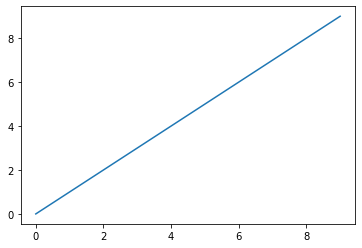

In [405]:
plt.plot(np.arange(10))

## matplotlib

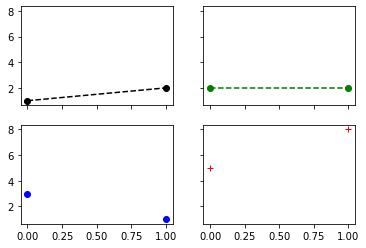

In [406]:
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 2,
                       sharex = True,
                       sharey = True)
ax[0,0].plot([1,2],'ko--')
ax[0,1].plot([2,2],'go--')
ax[1,0].plot([3,1],'bo')
ax[1,1].plot([5,8],'r+')

In [407]:
type(ax)

numpy.ndarray

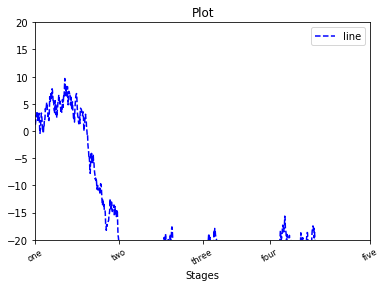

In [408]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(),
         'b--',
         label = 'line')

ax.legend(loc = 'best')

ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'],
                     rotation = 30,
                     fontsize = 'small')
ax.set_xlim([10, 900])
ax.set_ylim([-20, 20])

ax.set_title('Cumsum plot')

ax.set_xlabel('Stages')

prop = {
    'title':'Plot',
    'xlabel':'Stages',
    'xticks':[0,250,500,700,1000],
    'xticklabels':['one','two','three','four','five']
}

ax.set(**prop)

plt.savefig('plot.png', dpi = 400)

## pandas methods

In [409]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns = ['A','B','C','D'],
                  index = np.arange(0,100,10))
df

,A,B,C,D
0,-0.564758,-0.197789,0.750992,1.111329
10,-1.367747,-1.799318,-0.786591,3.376935
20,-1.085871,-1.629093,-0.642278,5.706115
30,-1.362841,-1.708039,-0.738551,4.998784
40,-1.034788,-0.938310,0.709501,5.072259
50,-2.257971,1.411780,0.591973,4.927654
60,-1.803193,2.302385,0.247429,5.340316
70,-3.636562,3.440099,1.381367,4.113413
80,-3.576223,2.191479,1.732601,3.030878
90,-2.487361,3.923193,0.456407,2.504272


<AxesSubplot:>

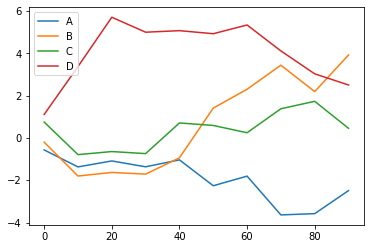

In [410]:
df.plot()

<AxesSubplot:>

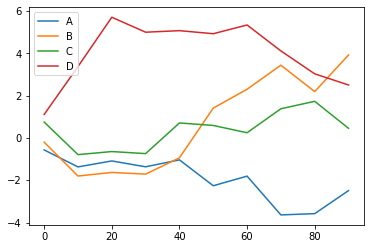

In [411]:
df.plot.line()

<AxesSubplot:>

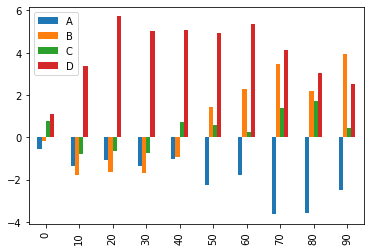

In [412]:
df.plot.bar()

<AxesSubplot:>

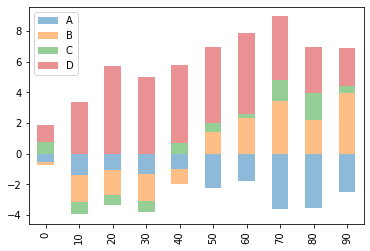

In [413]:
df.plot(kind = 'bar',
        stacked = True,
        alpha = 0.5)

In [414]:
df = pd.DataFrame({'A':np.random.normal(size = 1000)})
df

,A
0,-1.575302
1,-0.939568
2,1.327862
3,-0.453196
4,-0.686155
...,...
995,-0.911513
996,0.921207
997,-1.913551
998,-0.421798


<AxesSubplot:ylabel='Frequency'>

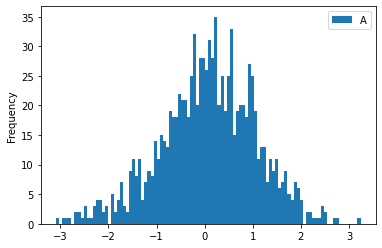

In [415]:
df.plot.hist(bins = 100)

<AxesSubplot:ylabel='Density'>

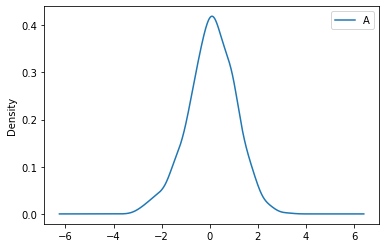

In [416]:
df.plot.density()

<AxesSubplot:ylabel='Density'>

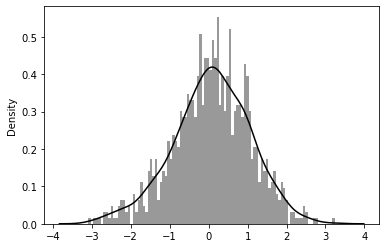

In [417]:
sns.distplot(df, bins = 100, color = 'k')

## seaborn

In [418]:
df = pd.DataFrame({'A':['one','two','three','four','five'] * 20,
                   'B':['Y','N'] * 50,
                   'C':np.random.random(100),
                   'D':np.random.randn(100)})
df

,A,B,C,D
0,one,Y,0.713543,-1.308161
1,two,N,0.225581,-1.495393
2,three,Y,0.065534,1.716638
3,four,N,0.903240,-0.434990
4,five,Y,0.809283,-1.994702
...,...,...,...,...
95,one,N,0.638002,0.225296
96,two,Y,0.949893,1.692515
97,three,N,0.405232,-1.744796
98,four,Y,0.042411,-2.006936


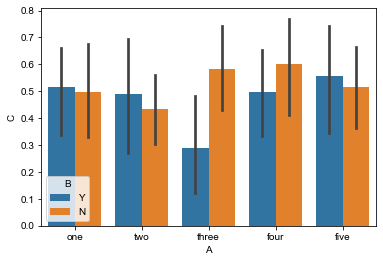

In [419]:
sns.barplot(data = df,
            x = 'A',
            y = 'C',
            hue = 'B')

sns.set(style = 'darkgrid')

In [420]:
df = pd.DataFrame({'A':np.random.normal(size = 1000),
                   'B':np.random.normal(size = 1000) * 2,
                   'C':np.random.normal(size = 1000) * 1.4 + 1,
                   'D':np.random.normal(size = 1000) /3 + 4,
                   'E':np.random.normal(size = 1000) ** 2})
df

,A,B,C,D,E
0,-0.239123,0.198448,1.866855,3.923938,0.417710
1,-0.271105,1.261763,1.906635,3.514009,0.267371
2,-0.884079,1.586171,1.631248,4.071590,0.000006
3,-0.384417,-1.061904,2.250747,4.019040,0.000035
4,-0.427332,-0.622192,-0.749036,3.646248,0.107765
...,...,...,...,...,...
995,1.032204,-5.477315,0.719869,4.025774,0.046672
996,0.469371,-4.626169,1.010736,4.032460,0.484992
997,-0.771820,-3.307126,0.758326,4.635878,0.391495
998,1.179982,-0.992455,1.025013,3.870433,0.118845


<AxesSubplot:xlabel='A', ylabel='B'>

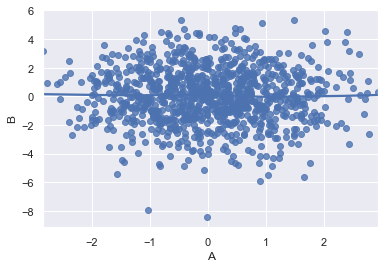

In [421]:
sns.regplot(data = df, x = 'A', y = 'B', lowess = True)

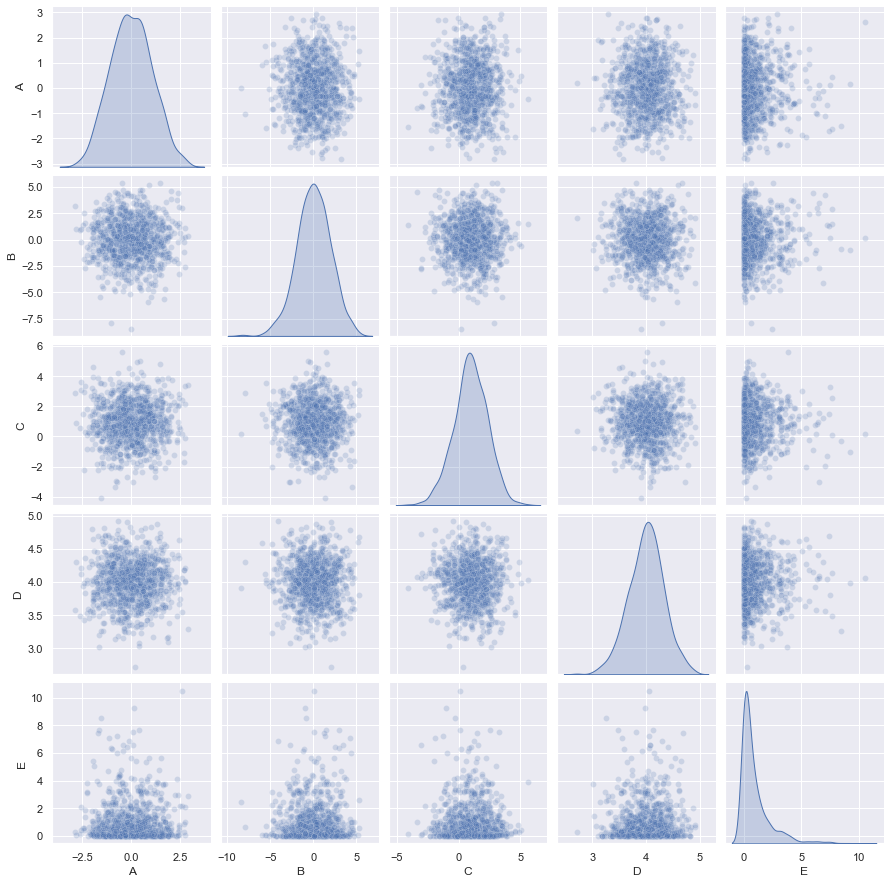

In [422]:
sns.pairplot(data = df, diag_kind = 'kde', plot_kws = {'alpha':0.2})

In [423]:
df = pd.DataFrame({'A':['Yes','No'] * 350,
                   'B':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] * 100,
                   'C':['Big','Small'] * 350,
                   'D':np.random.normal(size = 700)})
df

,A,B,C,D
0,Yes,Mon,Big,-0.760729
1,No,Tue,Small,-1.288876
2,Yes,Wed,Big,0.126226
3,No,Thu,Small,1.113780
4,Yes,Fri,Big,0.167898
...,...,...,...,...
695,No,Wed,Small,0.794277
696,Yes,Thu,Big,0.014602
697,No,Fri,Small,0.203294
698,Yes,Sat,Big,0.725664


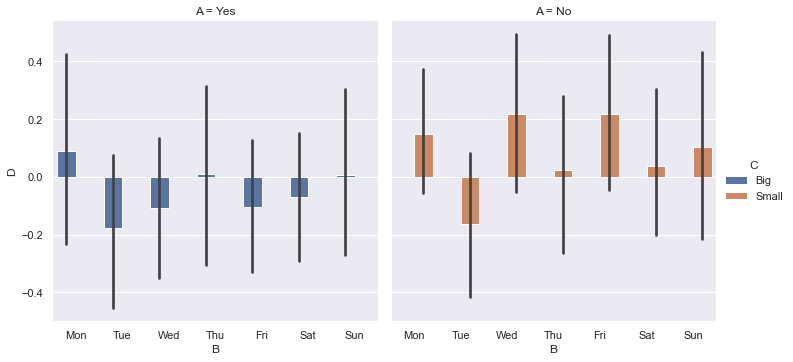

In [424]:
sns.catplot(data = df, x = 'B', y = 'D', hue = 'C', col = 'A', kind = 'bar')

# 15. Modeling

## pandas

In [425]:
df = pd.DataFrame({'x0':[1,2,3,4,5,6,7,8,9,10],
                   'x1':[0.01,-0.01,0.25,-4.1,0,1,0.5,0.2,0.1,0],
                   'y':[-1.5,0,3.6,1.3,-2,-1,2.3,1.4,2,-1.1],
                   'category':['a','b','a','a','b','a','a','b','b','a']})
df

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b
5,6,1.00,-1.0,a
6,7,0.50,2.3,a
7,8,0.20,1.4,b
8,9,0.10,2.0,b
9,10,0.00,-1.1,a


In [426]:
df.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'a'],
       [4, -4.1, 1.3, 'a'],
       [5, 0.0, -2.0, 'b'],
       [6, 1.0, -1.0, 'a'],
       [7, 0.5, 2.3, 'a'],
       [8, 0.2, 1.4, 'b'],
       [9, 0.1, 2.0, 'b'],
       [10, 0.0, -1.1, 'a']], dtype=object)

In [427]:
type(df.values)

numpy.ndarray

In [428]:
df.loc[:,['x0','x1']].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ],
       [ 6.  ,  1.  ],
       [ 7.  ,  0.5 ],
       [ 8.  ,  0.2 ],
       [ 9.  ,  0.1 ],
       [10.  ,  0.  ]])

In [429]:
df['category'] = pd.Categorical(values = ['a','b','a','a','b','a','a','b','b','a'],
                                categories = ['a','b'])
df

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b
5,6,1.00,-1.0,a
6,7,0.50,2.3,a
7,8,0.20,1.4,b
8,9,0.10,2.0,b
9,10,0.00,-1.1,a


In [430]:
dummies = pd.get_dummies(df.category, prefix = 'category')
df = df.drop('category', axis = 1).join(dummies)
df

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1
5,6,1.00,-1.0,1,0
6,7,0.50,2.3,1,0
7,8,0.20,1.4,0,1
8,9,0.10,2.0,0,1
9,10,0.00,-1.1,1,0


## Patsy

In [431]:
import patsy

In [432]:
df

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1
5,6,1.00,-1.0,1,0
6,7,0.50,2.3,1,0
7,8,0.20,1.4,0,1
8,9,0.10,2.0,0,1
9,10,0.00,-1.1,1,0


In [433]:
y, X = patsy.dmatrices('y ~ x0 + x1', data = df)

In [434]:
y, X

(DesignMatrix with shape (10, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   -1.0
    2.3
    1.4
    2.0
   -1.1
   Terms:
     'y' (column 0),
 DesignMatrix with shape (10, 3)
   Intercept  x0     x1
           1   1   0.01
           1   2  -0.01
           1   3   0.25
           1   4  -4.10
           1   5   0.00
           1   6   1.00
           1   7   0.50
           1   8   0.20
           1   9   0.10
           1  10   0.00
   Terms:
     'Intercept' (column 0)
     'x0' (column 1)
     'x1' (column 2))

In [435]:
np.asarray(y), np.asarray(X)

(array([[-1.5],
        [ 0. ],
        [ 3.6],
        [ 1.3],
        [-2. ],
        [-1. ],
        [ 2.3],
        [ 1.4],
        [ 2. ],
        [-1.1]]),
 array([[ 1.  ,  1.  ,  0.01],
        [ 1.  ,  2.  , -0.01],
        [ 1.  ,  3.  ,  0.25],
        [ 1.  ,  4.  , -4.1 ],
        [ 1.  ,  5.  ,  0.  ],
        [ 1.  ,  6.  ,  1.  ],
        [ 1.  ,  7.  ,  0.5 ],
        [ 1.  ,  8.  ,  0.2 ],
        [ 1.  ,  9.  ,  0.1 ],
        [ 1.  , 10.  ,  0.  ]]))

In [436]:
np.linalg.lstsq(X, y, rcond = None)

(array([[ 0.00959682],
        [ 0.08199541],
        [-0.19233374]]),
 array([30.88881319]),
 3,
 array([19.82274234,  4.27464145,  1.39965231]))

In [437]:
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', df)
y, X

(DesignMatrix with shape (10, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   -1.0
    2.3
    1.4
    2.0
   -1.1
   Terms:
     'y' (column 0),
 DesignMatrix with shape (10, 3)
   Intercept  x0  np.log(np.abs(x1) + 1)
           1   1                 0.00995
           1   2                 0.00995
           1   3                 0.22314
           1   4                 1.62924
           1   5                 0.00000
           1   6                 0.69315
           1   7                 0.40547
           1   8                 0.18232
           1   9                 0.09531
           1  10                 0.00000
   Terms:
     'Intercept' (column 0)
     'x0' (column 1)
     'np.log(np.abs(x1) + 1)' (column 2))

In [438]:
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', df)
y, X

(DesignMatrix with shape (10, 1)
      y
   -1.5
    0.0
    3.6
    1.3
   -2.0
   -1.0
    2.3
    1.4
    2.0
   -1.1
   Terms:
     'y' (column 0),
 DesignMatrix with shape (10, 3)
   Intercept  standardize(x0)  center(x1)
           1         -1.56670       0.215
           1         -1.21854       0.195
           1         -0.87039       0.455
           1         -0.52223      -3.895
           1         -0.17408       0.205
           1          0.17408       1.205
           1          0.52223       0.705
           1          0.87039       0.405
           1          1.21854       0.305
           1          1.56670       0.205
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2))

## statsmodels

In [439]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [440]:
sm.OLS(df['y'], df[['x0','x1']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):             -0.124
Method:                 Least Squares   F-statistic:                             0.4495
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                       0.653
Time:                        14:08:03   Log-Likelihood:                         -19.828
No. Observations:                  10   AIC:                                      43.66
Df Residuals:                       8   BIC:                                      44.26
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             0.0834      0.100      0.832      0.430      -0.148       0.315
x1            -0.1931      0.461     -0.419      0.687      -1.257       0.871
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.534
Skew:                           0.368   Prob(JB):                        0.766
Kurtosis:                       2.140   Cond. No.                         4.61
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [441]:
sm.OLS(df['y'], df[['x0','x1']]).fit().predict([1,2])

array([-0.3029248])

In [442]:
smf.ols('y ~ x0 + x1', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.247
Method:                 Least Squares   F-statistic:                    0.1100
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.897
Time:                        14:08:03   Log-Likelihood:                -19.828
No. Observations:                  10   AIC:                             45.66
Df Residuals:                       7   BIC:                             46.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0096      1.480      0.006      0.995      -3.490       3.509
x0             0.0820      0.236      0.347      0.738      -0.476       0.640
x1            -0.1923      0.509     -0.378      0.717      -1.395       1.011
==============================================================================
Omnibus:                        0.514   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.536
Skew:                           0.367   Prob(JB):                        0.765
Kurtosis:                       2.135   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
sm.tsa.AR(np.random.randn(100)).fit(MAXLAGS = 5).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                         AR(12)   Log Likelihood                -120.461
Method:                          cmle   S.D. of innovations              0.951
Date:                Wed, 24 Nov 2021   AIC                              0.218
Time:                        14:08:03   BIC                              0.612
Sample:                             0   HQIC                             0.377
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6128      0.186     -3.291      0.001      -0.978      -0.248
L1.y           0.0106      0.117      0.090      0.928      -0.219       0.240
L2.y          -0.0523      0.114     -0.457      0.647      -0.277       0.172
L3.y          -0.2681      0.115     -2.335      0.020      -0.493      -0.043
L4.y          -0.2246      0.120     -1.868      0.062      -0.460       0.011
L5.y          -0.0684      0.122     -0.559      0.576      -0.308       0.171
L6.y          -0.1518      0.123     -1.234      0.217      -0.393       0.089
L7.y          -0.1200      0.124     -0.971      0.332      -0.362       0.122
L8.y          -0.1155      0.123     -0.936      0.349      -0.357       0.126
L9.y          -0.0089      0.120     -0.074      0.941      -0.243       0.226
L10.y         -0.1017      0.114     -0.893      0.372      -0.325       0.122
L11.y         -0.3200      0.116     -2.768      0.006      -0.547      -0.093
L12.y          0.0257      0.123      0.208      0.835      -0.216       0.267
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1565           -0.0000j            1.1565           -0.5000
AR.2            -0.9505           -0.5603j            1.1033           -0.4152
AR.3            -0.9505           +0.5603j            1.1033            0.4152
AR.4            -0.5109           -1.0071j            1.1293           -0.3247
AR.5            -0.5109           +1.0071j            1.1293            0.3247
AR.6             0.1789           -1.0845j            1.0991           -0.2240
AR.7             0.1789           +1.0845j            1.0991            0.2240
AR.8             0.6929           -0.8256j            1.0779           -0.1389
AR.9             0.6929           +0.8256j            1.0779            0.1389
AR.10            1.0106           -0.4339j            1.0998           -0.0645
AR.11            1.0106           +0.4339j            1.0998            0.0645
AR.12           12.7887           -0.0000j           12.7887           -0.0000
------------------------------------------------------------------------------
"""

## sklearn

In [444]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [445]:
%%script echo skipping
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_
model.predict()

scores = cross_val_score(model, X_train, y_train, cv = 5)

skipping
